# CSC-5220-001 - Data Mining/Machine Learning Linear Regression Class Assignment 1B

The House Sales in King County data, USA. The dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

Aim is to predict the home prices starting with all the features except date.


In [1]:
#let us import the necessart tools at this point, we will import others as we go down in the codeline
import numpy as np
import pandas as pd 

# visualization tools

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#let us import the data we intend to use to predict the prices of houses in King Country
King_County_data_df = pd.read_csv("/Users/macbook/Documents/CSC5220_Programming/kc_house_data.csv")

In [4]:
King_County_data_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
King_County_data_df.head(4)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


In [5]:
King_County_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
King_County_data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<AxesSubplot:>

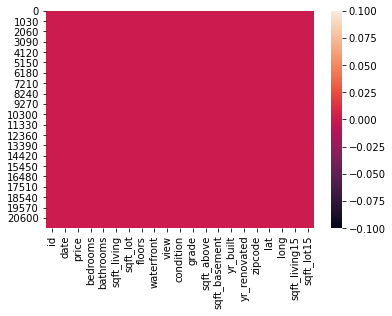

In [7]:
sns.heatmap(King_County_data_df.isnull()) #from the heatmap it is indicative the data is clean

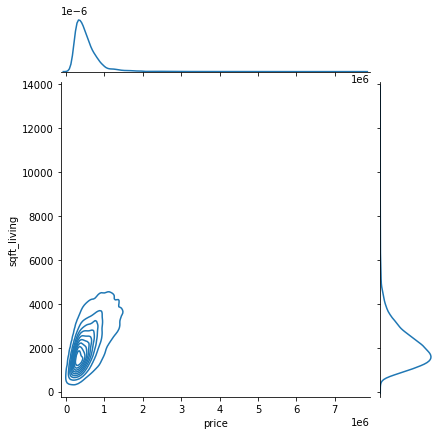

In [8]:
sns.jointplot(x = "price", y = "sqft_living", data = King_County_data_df, kind = "kde")
#to visualise the correlation between the price distribution and sqft_living

In [9]:
#let us call in our features and target data
X = King_County_data_df.drop(["price","date", "id"], axis = 1)
y = King_County_data_df["price"]

In [10]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
model.fit(X_train,y_train)

LinearRegression()

In [16]:
Prediction = model.predict(X_test)

In [17]:
Prediction

array([ 462027.36399088,  748557.76261941, 1239116.4719759 , ...,
        536075.22238339,  468607.60948914,  330175.44463887])

In [18]:
Coefficient = model.coef_

In [19]:
Coefficient

array([-3.25253868e+04,  4.18239501e+04,  1.07873564e+02,  1.09069106e-01,
        8.43473512e+03,  5.20262962e+05,  5.59933425e+04,  2.33272127e+04,
        9.43063481e+04,  6.84843271e+01,  3.93892364e+01, -2.60048772e+03,
        2.14480545e+01, -5.55529118e+02,  5.93711338e+05, -1.92811683e+05,
        2.05332304e+01, -3.44615971e-01])

In [20]:
#let us create a df for the coefficient so could be interpret properly 
Coefficient_df = pd.DataFrame(Coefficient,X.columns)

In [21]:
Coefficient_df

,0
bedrooms,-32525.386802
bathrooms,41823.950120
sqft_living,107.873564
sqft_lot,0.109069
floors,8434.735117
waterfront,520262.961648
view,55993.342513
condition,23327.212714
grade,94306.348129
sqft_above,68.484327


In [22]:
Coefficient_df.columns = ["Coefficients"]

In [23]:
Coefficient_df

,Coefficients
bedrooms,-32525.386802
bathrooms,41823.950120
sqft_living,107.873564
sqft_lot,0.109069
floors,8434.735117
waterfront,520262.961648
view,55993.342513
condition,23327.212714
grade,94306.348129
sqft_above,68.484327


In [24]:
"""
from the Coefficient_df, selecting from of the features, it could be interpreted as 

with other features constant, unit increase in the bedrooms will decrease the cost of the house by 32525.386802 dollars

with other features constant, unit increase in the bathrooms will increase the cost of the house by 41823.950120 dollars

with other features constant, unit increase in the sqft_living will increase the cost of the house by 107.873564 dollars

with other features constant, unit increase in the waterfront will increase the cost of the house by 520262.961648 dollars
"""

'\nfrom the Coefficient_df, selecting from of the features, it could be interpreted as \n\nwith other features constant, unit increase in the bedrooms will decrease the cost of the house by 32525.386802 dollars\n\nwith other features constant, unit increase in the bathrooms will increase the cost of the house by 41823.950120 dollars\n\nwith other features constant, unit increase in the sqft_living will increase the cost of the house by 107.873564 dollars\n\nwith other features constant, unit increase in the waterfront will increase the cost of the house by 520262.961648 dollars\n'

In [25]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [26]:
print(np.sqrt(mean_squared_error(y_test,Prediction))) 
print(r2_score(y_test, Prediction))

213134.00452624334
0.6966159937240277


The above output shows that the RMSE, one of the two evaluation metrics, is 213116.8542721505 thousand on the test data. On the other hand, R-squared value is 70 percent for test data

Text(0, 0.5, 'Predicted Y')

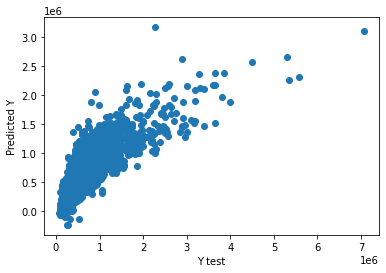

In [27]:
plt.scatter(y_test,Prediction)
plt.xlabel("Y test")
plt.ylabel("Predicted Y")

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

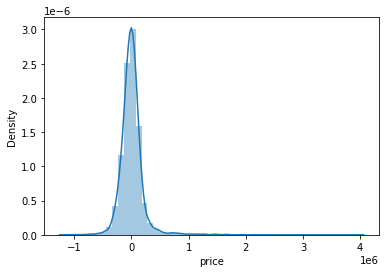

In [28]:
sns.distplot(y_test-Prediction)

# Using ridge regression, to predict the prices of house

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

Loss function = OLS + alpha * summation (squared coefficient values)

In the above loss function, alpha is the parameter we need to select. A low alpha value can lead to over-fitting, whereas a high alpha value can lead to under-fitting.

source: https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn


In [29]:
from sklearn.linear_model import Ridge

In [30]:
model_ridge = Ridge(alpha = 0.01)

In [31]:
model_ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [32]:
ridge_prediction = model_ridge.predict(X_test)

In [33]:
ridge_coef = model_ridge.coef_

In [34]:
ridge_coef

array([-3.25258366e+04,  4.18241161e+04,  1.07881970e+02,  1.09060027e-01,
        8.43587260e+03,  5.20201274e+05,  5.59955217e+04,  2.33269376e+04,
        9.43071455e+04,  6.84754920e+01,  3.93820049e+01, -2.60053368e+03,
        2.14482745e+01, -5.55501502e+02,  5.93685202e+05, -1.92797890e+05,
        2.05328668e+01, -3.44622397e-01])

In [35]:
ridge_coef_df = pd.DataFrame(ridge_coef,X.columns)

In [36]:
ridge_coef_df.columns = ["coefficient"]

In [37]:
ridge_coef_df

,coefficient
bedrooms,-32525.836600
bathrooms,41824.116101
sqft_living,107.881970
sqft_lot,0.109060
floors,8435.872600
waterfront,520201.274115
view,55995.521748
condition,23326.937559
grade,94307.145549
sqft_above,68.475492


In [38]:
print(np.sqrt(mean_squared_error(y_test,ridge_prediction)))
print(r2_score(y_test,ridge_prediction))

213134.44984080127
0.696614725963343


# Lasso Regression

Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is also a modification of linear regression. In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients (also called the l1-norm).

The loss function for Lasso Regression can be expressed as below:

Loss function = OLS + alpha * summation (absolute values of the magnitude of the coefficients)

In the above loss function, alpha is the penalty parameter we need to select. Using an l1 norm constraint forces some weight values to zero to allow other coefficients to take non-zero values.

In [39]:
from sklearn.linear_model import Lasso

In [40]:
lasso_model = Lasso(alpha=0.01)

In [41]:
lasso_model.fit(X_train,y_train)

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250987666456503.75, tolerance: 184465096316.27
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [42]:
lasso_predictions = lasso_model.predict(X_test)

In [43]:
lasso_coef = lasso_model.coef_

In [44]:
lasso_coef

array([-3.25253774e+04,  4.18239208e+04,  2.77462425e+02,  1.09068676e-01,
        8.43472775e+03,  5.20261336e+05,  5.59933937e+04,  2.33271777e+04,
        9.43063746e+04, -1.01104533e+02, -1.30199569e+02, -2.60048912e+03,
        2.14480648e+01, -5.55527732e+02,  5.93710690e+05, -1.92810756e+05,
        2.05331977e+01, -3.44616417e-01])

In [45]:
print(np.sqrt(mean_squared_error(y_test,lasso_predictions)))
print(r2_score(y_test,lasso_predictions))

213134.01908737002
0.6966159522701725


# ElasticNet Regression

ElasticNet combines the properties of both Ridge and Lasso regression. It works by penalizing the model using both the l2-norm and the l1-norm.



In [46]:
from sklearn.linear_model import ElasticNet

In [47]:
elastic_model = ElasticNet(alpha=0.01)

In [48]:
elastic_model.fit(X_train,y_train)

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292211611637566.1, tolerance: 184465096316.27
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.01)

In [49]:
elastic_prediction = elastic_model.predict(X_test)

In [50]:
elastic_coef = elastic_model.coef_

In [51]:
elastic_coef

array([-3.44401380e+04,  4.23068199e+04,  2.81816695e+02,  6.46288858e-02,
        1.42653540e+04,  2.80508336e+05,  6.34324369e+04,  2.15796391e+04,
        9.85622043e+04, -1.07956535e+02, -1.28160647e+02, -2.83786136e+03,
        2.17980260e+01, -4.09407945e+02,  4.51030463e+05, -1.25992730e+05,
        1.96839287e+01, -3.81875210e-01])

In [52]:
elastic_coef_df = pd.DataFrame(elastic_coef,X.columns)
elastic_coef_df.columns = ["coefficient"]

In [53]:
elastic_coef_df

,coefficient
bedrooms,-34440.138006
bathrooms,42306.819885
sqft_living,281.816695
sqft_lot,0.064629
floors,14265.353983
waterfront,280508.336319
view,63432.436923
condition,21579.639084
grade,98562.204280
sqft_above,-107.956535


In [54]:
print(np.sqrt(mean_squared_error(y_test,elastic_prediction)))
print(r2_score(y_test,elastic_prediction))

216783.4844367011
0.6861373932480904


# Report the root mean squared error averaged over 30 runs of 10-fold cv

In [55]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [56]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [57]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [109]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np
import warnings

In [111]:
# model = LogisticRegression(penalty= "none", max_iter=5000)
warnings.filterwarnings("ignore")

In [114]:
num_KFs = 10
num_repeats = 30
RMSE =[0]*num_repeats
i = 0
while i<num_repeats:
    print(i)
    #to prepare the cross-validation procedure 
    cv = KFold(n_splits=num_KFs, random_state=i, shuffle= True)
    #prepare the model
    # model = model_ridge
    #evaluate model
    ridge_scores = cross_val_score(model_ridge, X_train, y_train, scoring="neg_root_mean_squared_error", cv=cv, n_jobs=-1)
    RMSE[i]= scores.mean()
    i = i+1 #to repeat performance

# print("neg_mean_squared_error: %.3f (%.6f)" %np.sqrt(np.mean(scores)))
# RMSE = (scores)**0.5
# print(RMSE)
# print (-1*scores)
# print(acc)
print('RMSE: %.3f (%.6f)' % (np.mean(RMSE), np.std(RMSE)))   


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
RMSE: -195347.179 (0.000000)


In [115]:
num_KFs = 10
num_repeats = 30
RMSE =[0]*num_repeats
i = 0
while i<num_repeats:
    print(i)
    #to prepare the cross-validation procedure 
    cv = KFold(n_splits=num_KFs, random_state=i, shuffle= True)
    #prepare the model
    # model = model_ridge
    #evaluate model
    ridge_scores = cross_val_score(lasso_model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=cv, n_jobs=-1)
    RMSE[i]= scores.mean()
    i = i+1 #to repeat performance

# print("neg_mean_squared_error: %.3f (%.6f)" %np.sqrt(np.mean(scores)))
# RMSE = (scores)**0.5
# print(RMSE)
# print (-1*scores)
# print(acc)
print('RMSE: %.3f (%.6f)' % (np.mean(RMSE), np.std(RMSE)))   


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
RMSE: -195347.179 (0.000000)


In [118]:
num_KFs = 10
num_repeats = 30
RMSE =[0]*num_repeats
i = 0
while i<num_repeats:
    print(i)
    #to prepare the cross-validation procedure 
    cv = KFold(n_splits=num_KFs, random_state=i, shuffle= True)
    #prepare the model
    # model = model_ridge
    #evaluate model
    ridge_scores = cross_val_score(elastic_model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=cv, n_jobs=-1)
    RMSE[i]= scores.mean()
    i = i+1 #to repeat performance

# print("neg_mean_squared_error: %.3f (%.6f)" %np.sqrt(np.mean(scores)))
# RMSE = (scores)**0.5
# print(RMSE)
# print (-1*scores)
# print(acc)
print('RMSE: %.3f (%.6f)' % (np.mean(RMSE), np.std(RMSE)))   


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
RMSE: -195347.179 (0.000000)


In [ ]:
num_KFs = 10
num_repeats = 30
acc =[0]*num_repeats
i = 0
while i<num_repeats:
    print(i)
    #to prepare the cross-validation procedure 
    cv = KFold(n_splits=num_KFs, random_state=i, shuffle= True)
    #prepare the model
    # model = model_ridge
    #evaluate model
    # scores = cross_val_score(model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=cv, n_jobs=-1)
    params = {"alpha":[0.5,2,5,10]}
    # grid_obj = GridSearchCV(estimator=model_ridge, param_grid=params, scoring='neg_mean_squared_error')
    grid_obj = GridSearchCV(estimator=model_ridge, param_grid=params, cv=cv)
    grid_fit = grid_obj.fit(X_train, y_train)
    # best_model = grid_fit.best_estimator_
    best_model = grid_fit.best_score_
    # acc[i]= scores.mean()
    # i = i+1 #to repeat performance

# print("neg_mean_squared_error: %.3f (%.6f)" %np.sqrt(np.mean(scores)))
# RMSE = (scores)**0.5
# print(RMSE)
# print (-1*scores)
print(best_model)
# report performance
# print('Accuracy: %.3f (%.6f)' % (np.mean(acc), np.std(acc)))

In [107]:
numFolds = 10
numRepeats = 3
acc = [0] * numRepeats
# accuracy1 = accuracy2 = 0
i = 0
while (i < numRepeats):
    print(i)
    # prepare the cross-validation procedure
    cv_outer = KFold(n_splits=numFolds, random_state=i, shuffle=True)
    # enumerate splits
    test_score = 0
    j = 0
    for train_ix, test_ix in cv_outer.split(X):
        print(i,j)
        # print(test_ix)
        # split data
        # X_train, X_test = X[train_ix, :], X[test_ix, :]
        # X1_train, X1_test = X1[train_ix, :], X1[test_ix, :]
        # y_train, y_test = y[train_ix], y[test_ix]
        # configure the cross-validation procedure
        cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
        # create model
        # model = LogisticRegression(penalty='none',max_iter=6000)
        # evaluate model with feature set 1
        params = {"alpha":[2.5,5,10]}
        clssf = GridSearchCV(estimator=model_ridge, param_grid=params, cv=cv_inner)
        # scores = cross_val_score(model_ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=cv_inner, n_jobs=-1)
        #accuracy1 = accuracy1 + np.mean(scores1)
        # evaluate model with feature set 2
        # scores2 = cross_val_score(model, X1_train, y_train, scoring='accuracy', cv=cv_inner, n_jobs=-1)
        #accuracy2 = accuracy2 + np.mean(scores2)
     
        clssf.fit(X_train,y_train)
        clssf_score = cross_val_score(clssf, X_train, y_train, cv=cv_outer)
        # test_score = test_score + clssf.best_score_(X_test,y_test)
        # else:
        #     model.fit(X1_train,y_train)
        #     test_score = test_score + model.score(X1_test,y_test)
        #  clssf_score[i] =  clssf_score.mean()
        j = j+1
    # acc[i] = test_score/numFolds
    clssf_score[i] =  clssf_score.mean()
    i = i+1
       
# report performance
print('Our fitness score: %.3f (%.6f)' % ( clssf_score.mean(),  clssf_score.std()))

0
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
Our fitness score: 0.698 (0.018149)


In [120]:
numFolds = 10
numRepeats = 3
acc = [0] * numRepeats
# accuracy1 = accuracy2 = 0
i = 0
while (i < numRepeats):
    print(i)
    # prepare the cross-validation procedure
    cv_outer = KFold(n_splits=numFolds, random_state=i, shuffle=True)
    # enumerate splits
    test_score = 0
    j = 0
    for train_ix, test_ix in cv_outer.split(X):
        print(i,j)
        # print(test_ix)
        # split data
        # X_train, X_test = X[train_ix, :], X[test_ix, :]
        # X1_train, X1_test = X1[train_ix, :], X1[test_ix, :]
        # y_train, y_test = y[train_ix], y[test_ix]
        # configure the cross-validation procedure
        cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
        # create model
        # model = LogisticRegression(penalty='none',max_iter=6000)
        # evaluate model with feature set 1
        params = {"alpha":[2.5,5,10]}
        clssf = GridSearchCV(estimator=lasso_model, param_grid=params, cv=cv_inner)
        # scores = cross_val_score(model_ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=cv_inner, n_jobs=-1)
        #accuracy1 = accuracy1 + np.mean(scores1)
        # evaluate model with feature set 2
        # scores2 = cross_val_score(model, X1_train, y_train, scoring='accuracy', cv=cv_inner, n_jobs=-1)
        #accuracy2 = accuracy2 + np.mean(scores2)
     
        clssf.fit(X_train,y_train)
        clssf_score = cross_val_score(clssf, X_train, y_train, cv=cv_outer)
        # test_score = test_score + clssf.best_score_(X_test,y_test)
        # else:
        #     model.fit(X1_train,y_train)
        #     test_score = test_score + model.score(X1_test,y_test)
        #  clssf_score[i] =  clssf_score.mean()
        j = j+1
    # acc[i] = test_score/numFolds
    clssf_score[i] =  clssf_score.mean()
    i = i+1
       
# report performance
print('Our fitness score: %.3f (%.6f)' % ( clssf_score.mean(),  clssf_score.std()))

0
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
Our fitness score: 0.698 (0.018249)


In [122]:
numFolds = 10
numRepeats = 3
acc = [0] * numRepeats
# accuracy1 = accuracy2 = 0
i = 0
while (i < numRepeats):
    print(i)
    # prepare the cross-validation procedure
    cv_outer = KFold(n_splits=numFolds, random_state=i, shuffle=True)
    # enumerate splits
    test_score = 0
    j = 0
    for train_ix, test_ix in cv_outer.split(X):
        print(i,j)
        # print(test_ix)
        # split data
        # X_train, X_test = X[train_ix, :], X[test_ix, :]
        # X1_train, X1_test = X1[train_ix, :], X1[test_ix, :]
        # y_train, y_test = y[train_ix], y[test_ix]
        # configure the cross-validation procedure
        cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
        # create model
        # model = LogisticRegression(penalty='none',max_iter=6000)
        # evaluate model with feature set 1
        params = {"alpha":[2.5,5,10],
                  "l1_ratio":[0.1,0.3,0.7,0.95]}
        clssf = GridSearchCV(estimator=elastic_model, param_grid=params, cv=cv_inner)
        # scores = cross_val_score(model_ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=cv_inner, n_jobs=-1)
        #accuracy1 = accuracy1 + np.mean(scores1)
        # evaluate model with feature set 2
        # scores2 = cross_val_score(model, X1_train, y_train, scoring='accuracy', cv=cv_inner, n_jobs=-1)
        #accuracy2 = accuracy2 + np.mean(scores2)
     
        clssf.fit(X_train,y_train)
        clssf_score = cross_val_score(clssf, X_train, y_train, cv=cv_outer)
        # test_score = test_score + clssf.best_score_(X_test,y_test)
        # else:
        #     model.fit(X1_train,y_train)
        #     test_score = test_score + model.score(X1_test,y_test)
        #  clssf_score[i] =  clssf_score.mean()
        j = j+1
    # acc[i] = test_score/numFolds
    clssf_score[i] =  clssf_score.mean()
    i = i+1
       
# report performance
print('Our fitness score: %.3f (%.6f)' % ( clssf_score.mean(),  clssf_score.std()))

0
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
Our fitness score: 0.649 (0.015872)
